In [435]:
# Importing python basic package 
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [436]:
# Import the dataset

train = pd.read_csv('D:\\ML-Projects\\2-Logistic Regression\\Dataset\\train.csv')
test = pd.read_csv('D:\\ML-Projects\\2-Logistic Regression\\Dataset\\test.csv')

In [437]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [438]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [439]:
train['data'] = 'train'
test['data'] = 'test'

In [440]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [441]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [442]:
# Appending both the train & test data 

all_data = pd.concat([train,test], axis=0)

In [443]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [444]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [445]:
# Checking the shape of dataset

all_data.shape

(1309, 13)

In [446]:
# Checking the information of dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


### Pre-processing of required 

In [447]:
# Step-1 : Checking the missing data in dataset
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [448]:
# Checking the missing percentage of dataset
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

#### 'Cabin' is non significant feature which having 77.46% missing data, so we will drop this variable.

In [449]:
all_data= all_data.drop(['Cabin'], axis=1)


In [450]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

### 'Age' coloumn having 20 % missing data,which is less then 25% , So we need to do imputation techenique,

In [451]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [452]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

### 'PassengerId', 'Fare',  'Name', 'Ticket', coloumn are non significant variable, so we can drop this varible.

In [453]:
all_data = all_data.drop(['PassengerId','Name','Fare','Ticket'],axis=1)

In [454]:
all_data.isnull().sum()/len(all_data)*100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Embarked     0.152788
data         0.000000
dtype: float64

In [455]:
# Embark treatment
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [456]:
all_data['Embarked']= all_data['Embarked'].fillna('S')

In [457]:
all_data.isnull().sum()/len(all_data)*100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Embarked     0.000000
data         0.000000
dtype: float64

In [458]:
all_data.shape

(1309, 8)

In [459]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


###   * Handling the missing value is completed

### Step 2 : Encoding required 

In [460]:
all_data = pd.get_dummies(all_data, columns=['Pclass','Sex','Embarked'],drop_first=True,dtype=float)

In [461]:
all_data.head(2)

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0.0,1.0,1.0,0.0,1.0
1,1.0,38.0,1,0,train,0.0,0.0,0.0,0.0,0.0


##### Outliers treatement : There is no outliers present in Age coloumn, Age range is correct.
      Since it is logistic regression, so need to outliers treatement, 
      becouse due to sigmoid curve,outputs is range betwee 0 to 1 

#### Saperiting train & test data

In [462]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']== 'test']

In [463]:
train.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0.0,1.0,1.0,0.0,1.0
1,1.0,38.0,1,0,train,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0,0,train,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1,0,train,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0,0,train,0.0,1.0,1.0,0.0,1.0


In [464]:
test.head(2)

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,test,0.0,1.0,1.0,1.0,0.0
1,NaN,47.0,1,0,test,0.0,1.0,0.0,0.0,1.0


In [465]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [466]:
train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0.0,1.0,1.0,0.0,1.0
1,1.0,38.0,1,0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0,0,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1,0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0,0,0.0,1.0,1.0,0.0,1.0


In [467]:
test.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,0.0,1.0,1.0,1.0,0.0
1,NaN,47.0,1,0,0.0,1.0,0.0,0.0,1.0
2,NaN,62.0,0,0,1.0,0.0,1.0,1.0,0.0
3,NaN,27.0,0,0,0.0,1.0,1.0,0.0,1.0
4,NaN,22.0,1,1,0.0,1.0,0.0,0.0,1.0


### Spliting the data into dependent & independent variable

In [468]:
x = train.drop(['Survived'],axis=1)
y = train['Survived']

In [469]:
x.head(2)

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0.0,1.0,1.0,0.0,1.0
1,38.0,1,0,0.0,0.0,0.0,0.0,0.0


In [470]:
y.head(2)

0    0.0
1    1.0
Name: Survived, dtype: float64

In [471]:
x1 = test.drop(['Survived'],axis=1)
y1 = test['Survived']

In [472]:
x1.head(2)

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0.0,1.0,1.0,1.0,0.0
1,47.0,1,0,0.0,1.0,0.0,0.0,1.0


In [473]:
y1.head(2)

0   NaN
1   NaN
Name: Survived, dtype: float64

### Checking the Imbalance dataset

In [474]:
y.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

### All the pre processing part is completed.
### Lets have a look for EDA 

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


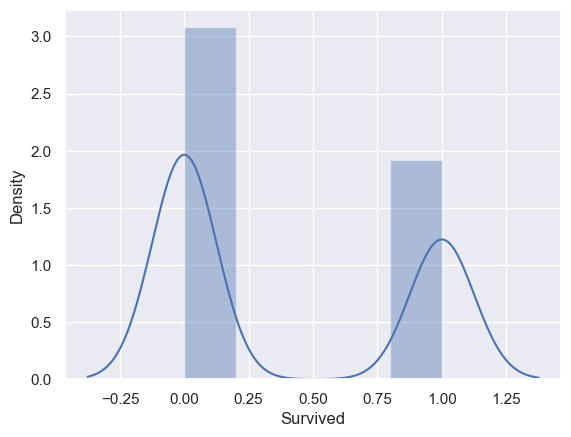

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


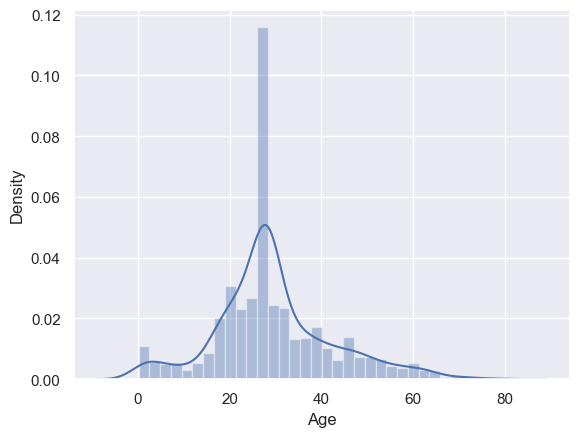

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


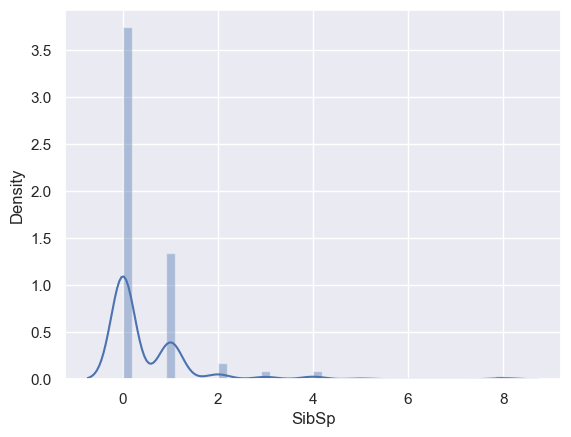

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


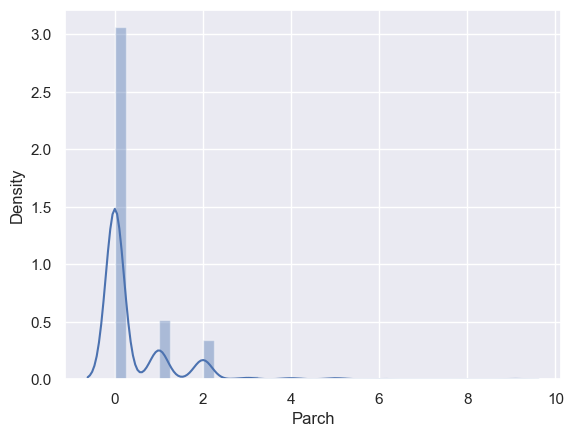

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


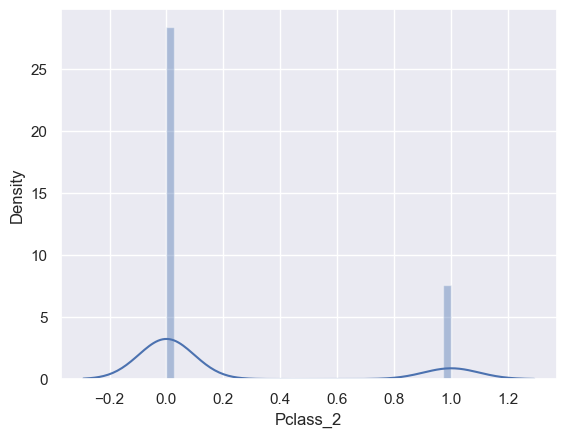

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


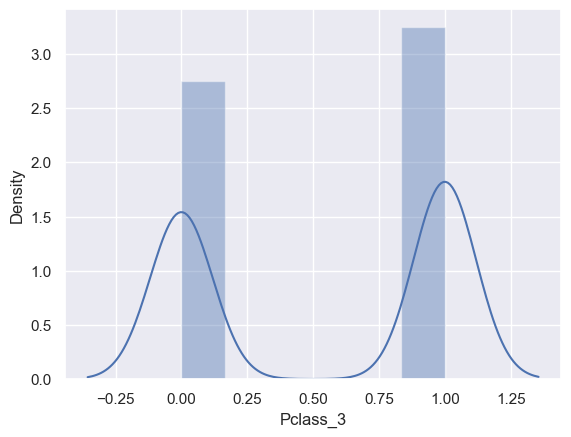

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


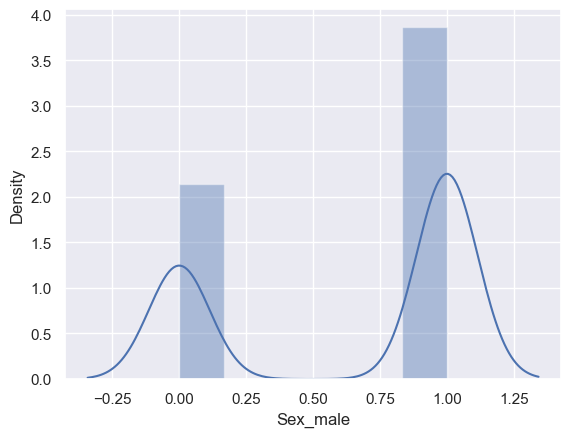

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


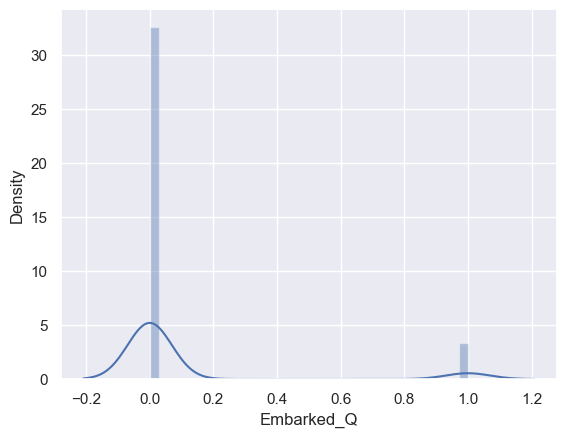

C:\Users\user\AppData\Local\Temp\ipykernel_16620\3304427321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


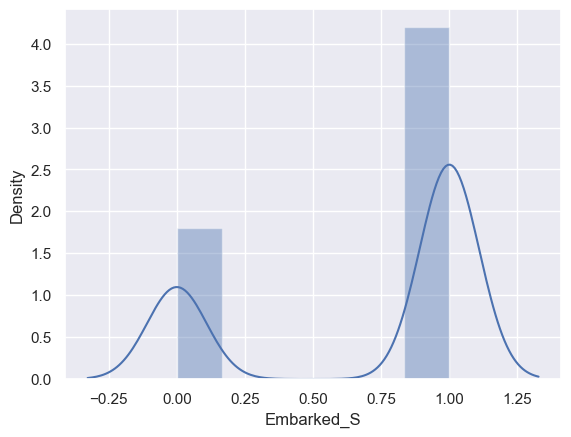

In [484]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)